In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient
client = MongoClient() # Creates a client that uses the default port on localhost.
database = client.medical_notes_kaggle # Connect to medical_notes_kaggle database

# Import Data

In [2]:
# import labeled data
mongodb_query = database.train.find({})
train_tuple = list(mongodb_query)

In [3]:
# Store data in a dataframe
train_df = pd.DataFrame(columns=['index_', 'note_text', 'section_headers', 'clinical_domain']) # Create empty dataframe
keys_to_exclude = set(('_id', 'index_', 'clinical_domain'))

for i in range(len(train_tuple)):
    index_int = int(str({v for k,v in train_tuple[i].items() if k in 'index_'})[2:-2])
    note_text_str = str({v for k,v in train_tuple[i].items() if k not in keys_to_exclude})[1:-1]
    section_headers_str = str({k for k,v in train_tuple[i].items() if k not in keys_to_exclude})[1:-1]
    clinical_domain_str = str({v for k,v in train_tuple[i].items() if k in 'clinical_domain'})[2:-2]

    train_df = train_df.append(
        {'index_': index_int,
         'clinical_domain': clinical_domain_str,
         'note_text': note_text_str,
         'section_headers': section_headers_str}, ignore_index=True)

In [4]:
train_df = train_df.sort_values('index_').reset_index(drop=True) # Sort values to ensure data is in the same order

In [5]:
# Drop missing values
train_df.section_headers = train_df.section_headers.replace('et(', np.nan)
train_df.note_text = train_df.note_text.replace('et(', np.nan)
train_df = train_df.dropna().reset_index(drop=True)

In [6]:
train_df['text_length'] = train_df.note_text.apply(len) # Add text_length column
train_df['section_headers_count'] = train_df.section_headers.apply(lambda x: x.count(',') +1) # Count section headers

In [7]:
train_df # View data

,index_,note_text,section_headers,clinical_domain,text_length,section_headers_count
0,1001,"'BP150/79, HR77, RR22, 37.4C. MS: A&O to perso...","'COURSE', 'HX', 'CC', 'PMH', 'FHX', 'SHX', 'EX...",Neurology,5433,8
1,1002,"'General.', 'Less than 5 mL.', 'After a succes...","'POSTOPERATIVE DIAGNOSIS', 'ESTIMATED BLOOD LO...",Orthopedic,1432,5
2,1003,"'Less than 100 mL.', '1000 mL.', 'To postanest...","'DRAINS', 'CONDITION', 'FLUIDS', 'COMPLICATION...",Orthopedic,6452,13
3,1004,'Examination was performed on 9/1/05. There is...,"'CLINICAL', 'FINDINGS', 'IMPRESSION', 'EXAM'",Radiology,2765,4
4,1005,"'1. Recurrent bunion deformity, right forefoo...","'PLAN/TREATMENT', 'ASSESSMENT', 'X-RAY INTERPR...",Orthopedic,3119,8
5,1006,"'VITAL SIGNS: Temperature 96.5, blood pressur...","'DISCHARGE DIAGNOSES', 'MEDICATIONS', 'INSTRUC...",Orthopedic,6717,9
6,1007,"'I will have the patient follow up with me, wi...","'PROCEDURES PERFORMED', 'PROCEDURE', 'INDICATI...",Gastroenterology,3040,5
7,1008,'Vitals were unremarkable. The neurologic exam...,"'COURSE', 'HX', 'CC', 'PMH', 'FHX', 'SHX', 'EX...",Radiology,1645,8
8,1009,'Anesthesia is local with conscious sedation.'...,"'MEDICATIONS', 'COMPLICATIONS', 'POSTOPERATIVE...",Urology,1985,8
9,1010,'In addition to the aforementioned medications...,"'MEDICATIONS', 'ASSESSMENT', 'HISTORY OF PRESE...",Orthopedic,4657,7


# Get High Level Overview

clinical_domain
Gastroenterology    2462.656051
Neurology           3453.992908
Orthopedic          3859.504505
Radiology           1893.930851
Urology             2515.563636
Name: text_length, dtype: float64

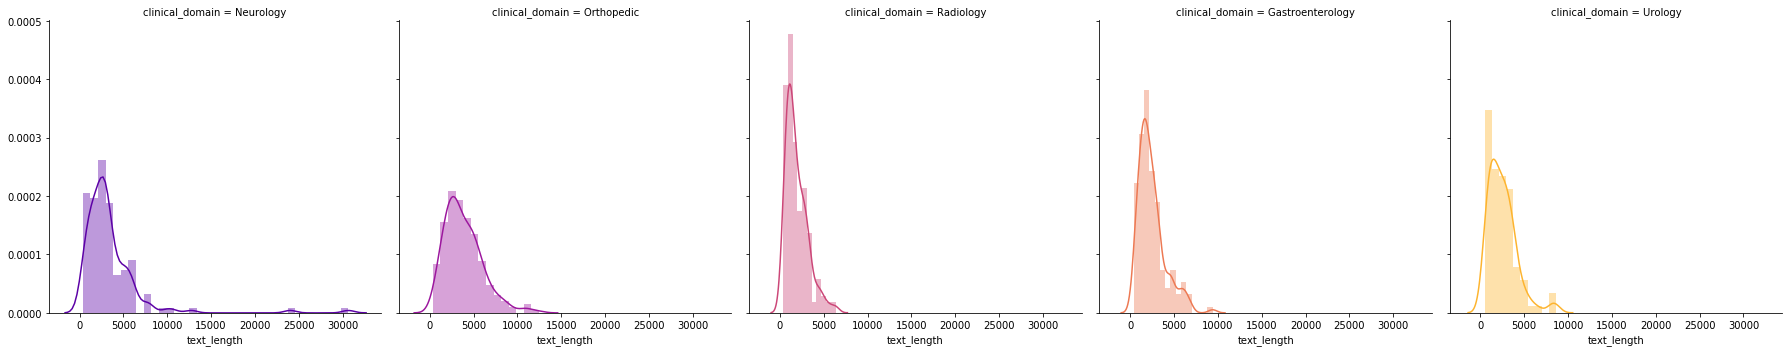

In [8]:
# Check distribution of data by class
a = sns.FacetGrid(data = train_df, col = 'clinical_domain', hue = 'clinical_domain', palette='plasma', height=5)
a.map(sns.distplot, "text_length")
train_df.groupby('clinical_domain').mean()['text_length']

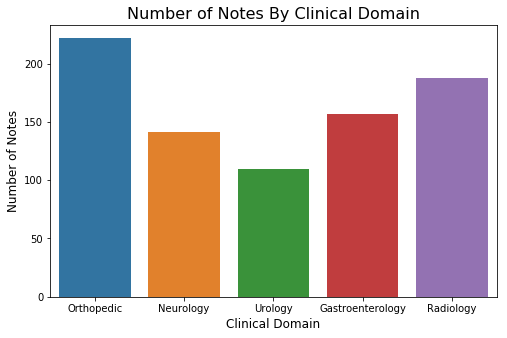

In [9]:
# Check number of notes per class
plt.figure(figsize = (8,5))
order_list = ['Orthopedic', 'Neurology', 'Urology', 'Gastroenterology', 'Radiology']
sns.countplot('clinical_domain', data = train_df, palette=None, order = order_list)
plt.xlabel('Clinical Domain', fontsize=12)
plt.ylabel('Number of Notes', fontsize=12)
plt.title('Number of Notes By Clinical Domain', fontsize=16)
plt.savefig("figures/number-of-notes-by-clinical-domain-bar.png", transparent=True, bbox_inches="tight")

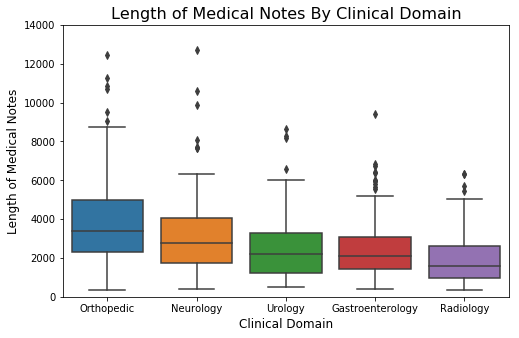

In [10]:
# Make a violin plot of the length of the note_text for each category
plt.figure(figsize = (8, 5))
order_list = ['Orthopedic', 'Neurology', 'Urology', 'Gastroenterology', 'Radiology']
sns.boxplot(x = 'clinical_domain', y = 'text_length', data = train_df, order = order_list)
plt.xlabel('Clinical Domain', fontsize=12)
plt.ylabel('Length of Medical Notes', fontsize=12)
plt.ylim((0, 14000))
plt.title('Length of Medical Notes By Clinical Domain', fontsize=16)
plt.savefig("figures/length-of-medical-notes-by-clinical-domain.png", transparent=True, bbox_inches="tight")

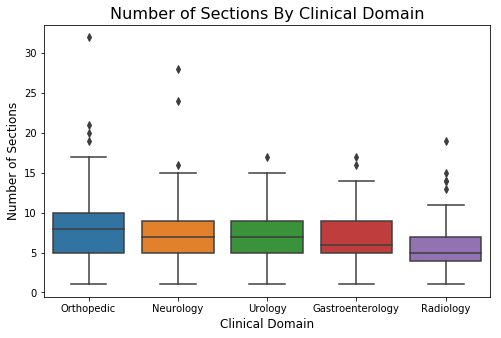

In [11]:
# Make a violin plot of the number of section_headers for each category
plt.figure(figsize = (8, 5))
order_list = ['Orthopedic', 'Neurology', 'Urology', 'Gastroenterology', 'Radiology']
sns.boxplot(x = 'clinical_domain', y = 'section_headers_count', data = train_df, order = order_list)
plt.xlabel('Clinical Domain', fontsize=12)
plt.ylabel('Number of Sections', fontsize=12)
plt.title('Number of Sections By Clinical Domain', fontsize=16)
plt.savefig("figures/number-of-sections-by-clinical-domain.png", transparent=True, bbox_inches="tight")